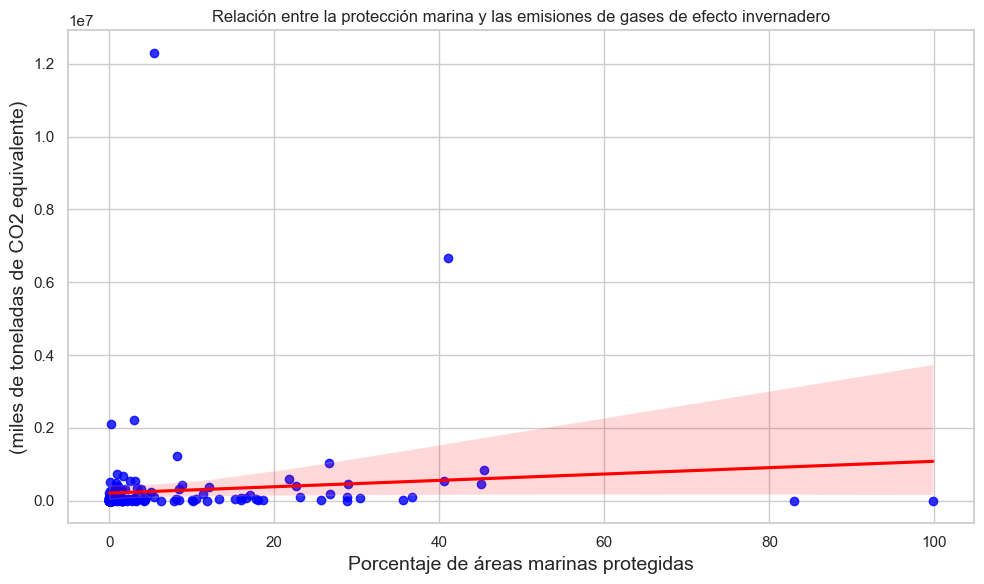

📈 ضریب همبستگی پیرسون: 0.1063, p-value: 0.2000
📈 ضریب همبستگی اسپیرمن: 0.3973, p-value: 0.0000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


marine_df = pd.read_csv("~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Marine and Coastal Areas/Marine protected areas.csv")
ghg_df = pd.read_csv("~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Air and Climate/GHG_Emissions.csv")

marine_df = marine_df[['Country and area', 'Marine protected areas (% of territorial waters)']]
marine_df.columns = ['Country', 'Marine Protected (%)']

ghg_df = ghg_df[['Country', 'GHG total without LULUCF, latest year']]
ghg_df.columns = ['Country', 'GHG Emissions (kt CO2e)']

# quitar los nulls
marine_df.dropna(inplace=True)
ghg_df.dropna(inplace=True)

merged_df = pd.merge(marine_df, ghg_df, on='Country')

merged_df = merged_df[merged_df['Marine Protected (%)'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
merged_df = merged_df[merged_df['GHG Emissions (kt CO2e)'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

merged_df['Marine Protected (%)'] = merged_df['Marine Protected (%)'].astype(float)
merged_df['GHG Emissions (kt CO2e)'] = merged_df['GHG Emissions (kt CO2e)'].astype(float)

# quitar outliers

merged_df = merged_df[(merged_df['Marine Protected (%)'] >= 0) & (merged_df['Marine Protected (%)'] <= 100)]



#pearson
pearson_corr, pearson_pval = pearsonr(merged_df['Marine Protected (%)'], merged_df['GHG Emissions (kt CO2e)'])
# spearman
spearman_corr, spearman_pval = spearmanr(merged_df['Marine Protected (%)'], merged_df['GHG Emissions (kt CO2e)'])

plt.figure(figsize=(10,6))
sns.regplot(data=merged_df, x='Marine Protected (%)', y='GHG Emissions (kt CO2e)', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Relación entre la protección marina y las emisiones de gases de efecto invernadero', fontsize=12)
plt.xlabel('Porcentaje de áreas marinas protegidas', fontsize=14)
plt.ylabel('(miles de toneladas de CO2 equivalente)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"ضریب همبستگی پیرسون: {pearson_corr:.4f}, p-value: {pearson_pval:.4f}")
print(f"ضریب همبستگی اسپیرمن: {spearman_corr:.4f}, p-value: {spearman_pval:.4f}")




سوال 2- تحلیل رابطه بین حفاظت مناطق دریایی و انتشار گازهای گلخانه‌ای سرانه 

📈 ضریب همبستگی پیرسون: -0.2152, p-value: 0.3623
📈 ضریب همبستگی اسپیرمن: 0.0039, p-value: 0.9871


C:\Users\CanteMosh\AppData\Local\Temp\ipykernel_4752\1367641896.py:47: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\CanteMosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


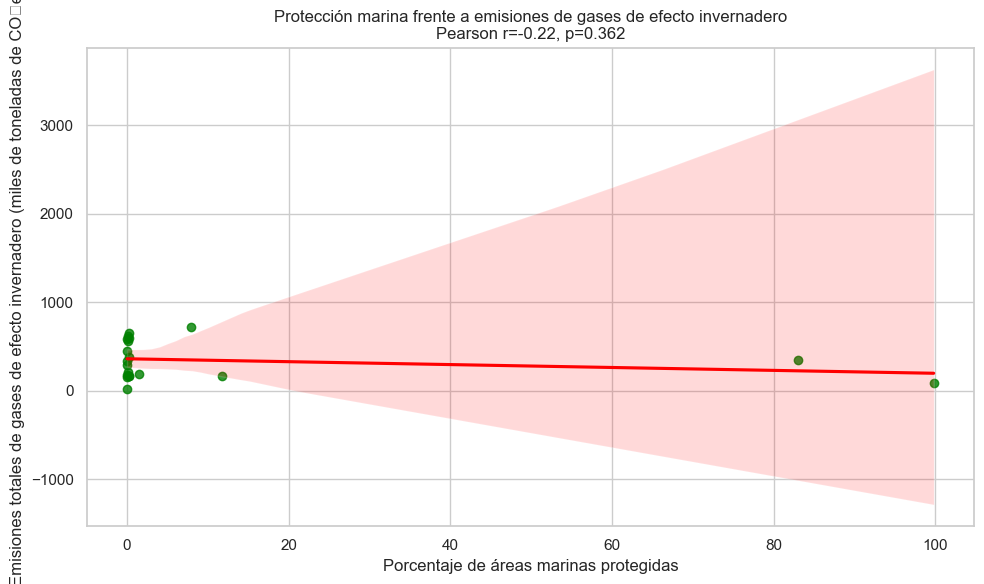

In [ ]:

ghg_df = pd.read_csv("~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Air and Climate/GHG_Emissions_by_Sector.csv")
marine_df = pd.read_csv("~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Marine and Coastal Areas/Marine protected areas.csv")

marine_df = marine_df[["Country and area", "Marine protected areas (% of territorial waters)"]]
marine_df.columns = ['Country', 'Marine Protected (%)']

ghg_df = ghg_df[['Country', 'Total GHG emissions without LULUCF (1000 tonnes of CO₂ equivalent)']]
ghg_df.columns = ['Country', 'Total GHG Emissions (1000 tCO2e)']

marine_df.dropna(inplace=True)
ghg_df.dropna(inplace=True)

merged_df = pd.merge(marine_df, ghg_df, on='Country')

merged_df = merged_df[merged_df['Marine Protected (%)'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
merged_df = merged_df[merged_df['Total GHG Emissions (1000 tCO2e)'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

merged_df['Marine Protected (%)'] = merged_df['Marine Protected (%)'].astype(float)
merged_df['Total GHG Emissions (1000 tCO2e)'] = merged_df['Total GHG Emissions (1000 tCO2e)'].astype(float)

pearson_corr, pearson_pval = pearsonr(merged_df['Marine Protected (%)'], merged_df['Total GHG Emissions (1000 tCO2e)'])
spearman_corr, spearman_pval = spearmanr(merged_df['Marine Protected (%)'], merged_df['Total GHG Emissions (1000 tCO2e)'])

print(f"ضریب همبستگی پیرسون: {pearson_corr:.4f}, p-value: {pearson_pval:.4f}")
print(f"ضریب همبستگی اسپیرمن: {spearman_corr:.4f}, p-value: {spearman_pval:.4f}")


plt.figure(figsize=(10,6))
sns.regplot(data=merged_df, x='Marine Protected (%)', y='Total GHG Emissions (1000 tCO2e)', scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title(f'Protección marina frente a emisiones de gases de efecto invernadero\nPearson r={pearson_corr:.2f}, p={pearson_pval:.3f}')
plt.xlabel('Porcentaje de áreas marinas protegidas')
plt.ylabel('Emisiones totales de gases de efecto invernadero (miles de toneladas de CO₂e)')

plt.grid(True)
plt.tight_layout()
plt.show()



تحلیل برای GHG from energy, as percentage to total:
📈 ضریب همبستگی پیرسون: 0.2583, p-value: 0.0044
📈 ضریب همبستگی اسپیرمن: 0.1821, p-value: 0.0465


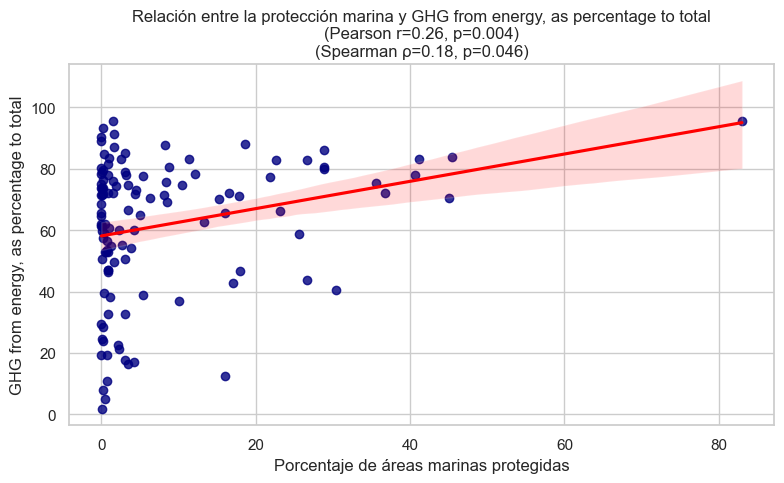


تحلیل برای GHG from industrial processes and product use, as percentage to total:
📈 ضریب همبستگی پیرسون: -0.0433, p-value: 0.6384
📈 ضریب همبستگی اسپیرمن: 0.1272, p-value: 0.1662


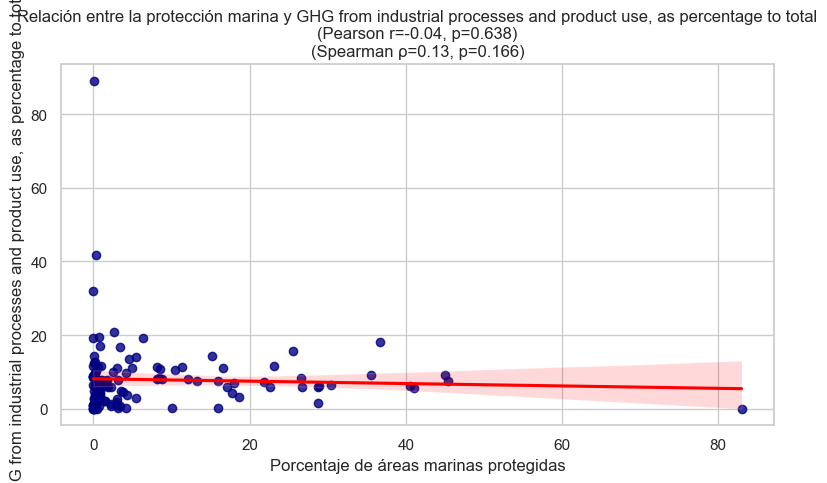


تحلیل برای GHG from agriculture, as percentage to total:
📈 ضریب همبستگی پیرسون: -0.1917, p-value: 0.0360
📈 ضریب همبستگی اسپیرمن: -0.0705, p-value: 0.4441


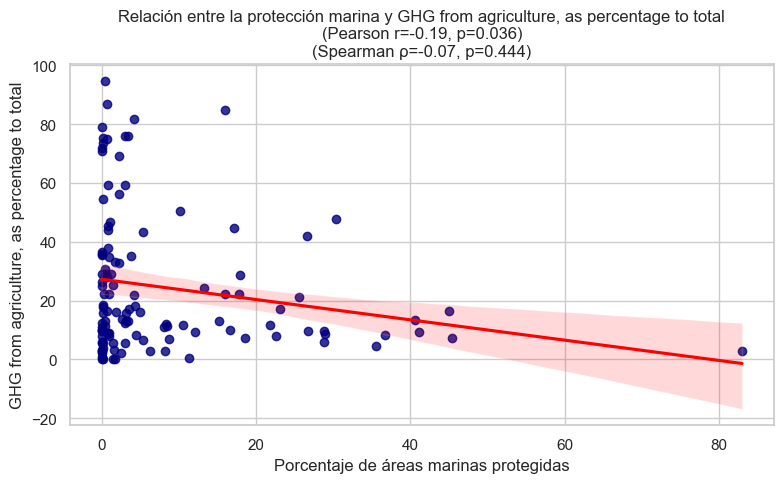


تحلیل برای GHG from waste, as percentage to total:
📈 ضریب همبستگی پیرسون: -0.1788, p-value: 0.0507
📈 ضریب همبستگی اسپیرمن: -0.0734, p-value: 0.4255


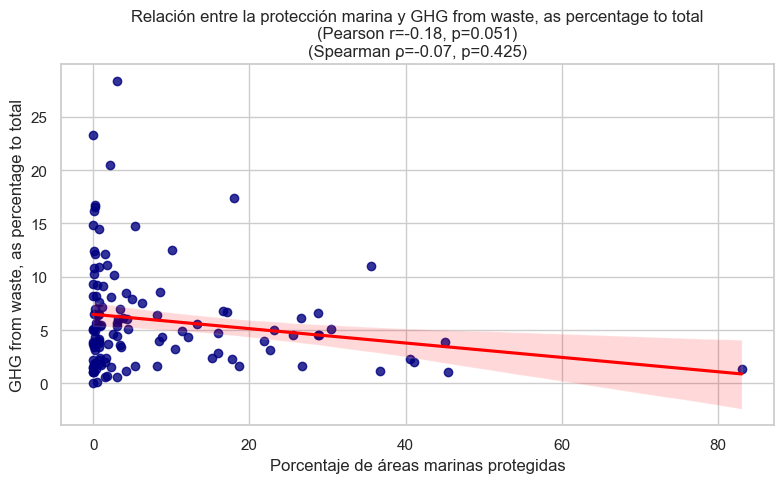

In [ ]:

sector_df = pd.read_csv("~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Air and Climate/GHG_Emissions_by_Sector.csv")
marine_df = pd.read_csv("~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Marine and Coastal Areas/Marine protected areas.csv")

# آماده‌سازی داده‌ها
marine_df = marine_df[["Country and area", "Marine protected areas (% of territorial waters)"]]
marine_df.columns = ['Country', 'Marine Protected (%)']

sector_df = sector_df[['Country', 
                       'GHG from energy, as percentage to total',
                       'GHG from industrial processes and product use, as percentage to total',
                       'GHG from agriculture, as percentage to total',
                       'GHG from waste, as percentage to total']]


merged_sector = pd.merge(marine_df, sector_df, on='Country')

merged_sector.dropna(inplace=True)


cols_to_convert = ['Marine Protected (%)', 
                   'GHG from energy, as percentage to total',
                   'GHG from industrial processes and product use, as percentage to total',
                   'GHG from agriculture, as percentage to total',
                   'GHG from waste, as percentage to total']

for col in cols_to_convert:
    merged_sector[col] = pd.to_numeric(merged_sector[col], errors='coerce')


merged_sector.dropna(inplace=True)


for col in cols_to_convert:
    merged_sector = merged_sector[(merged_sector[col] >= 0) & (merged_sector[col] <= 100)]


for column in ['GHG from energy, as percentage to total', 
               'GHG from industrial processes and product use, as percentage to total',
               'GHG from agriculture, as percentage to total', 
               'GHG from waste, as percentage to total']:
    

    pearson_corr, pearson_pval = pearsonr(merged_sector['Marine Protected (%)'], merged_sector[column])
    spearman_corr, spearman_pval = spearmanr(merged_sector['Marine Protected (%)'], merged_sector[column])

    print(f"\nتحلیل برای {column}:")
    print(f"ضریب همبستگی پیرسون: {pearson_corr:.4f}, p-value: {pearson_pval:.4f}")
    print(f"ضریب همبستگی اسپیرمن: {spearman_corr:.4f}, p-value: {spearman_pval:.4f}")

    # رسم نمودار
    plt.figure(figsize=(8,5))
    sns.regplot(data=merged_sector, x='Marine Protected (%)', y=column,
                scatter_kws={"color": "navy"}, line_kws={"color": "red"})
    plt.title(f'Relación entre la protección marina y {column}\n(Pearson r={pearson_corr:.2f}, p={pearson_pval:.3f})\n(Spearman ρ={spearman_corr:.2f}, p={spearman_pval:.3f})')
    plt.xlabel('Porcentaje de áreas marinas protegidas')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()




ضریب همبستگی (r): 0.0546
مقدار p-value: 0.5095


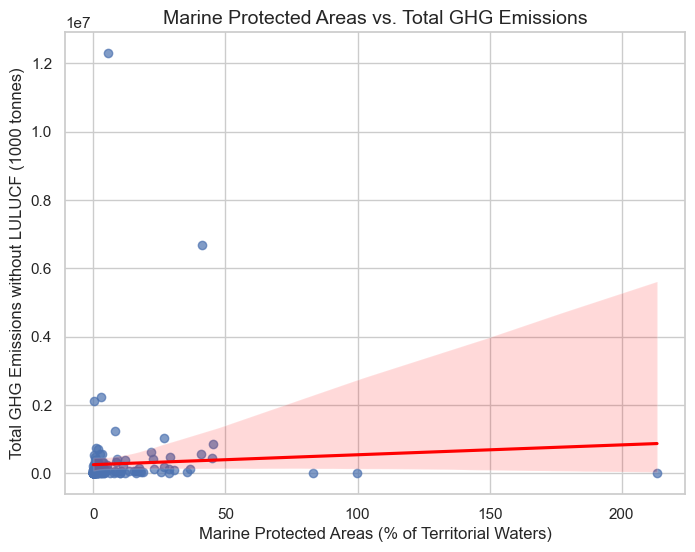

In [ ]:

marine = pd.read_csv("~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Marine and Coastal Areas/Marine protected areas.csv")
ghg = pd.read_csv('~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Air and Climate/GHG_Emissions.csv')

marine = marine[['CountryID', 'Country and area', 'Marine protected areas (% of territorial waters)']]
ghg = ghg[['Country ID', 'Country', 'GHG total without LULUCF, latest year']]


df = pd.merge(marine, ghg, left_on='CountryID', right_on='Country ID')

df = df.dropna(subset=['Marine protected areas (% of territorial waters)', 'GHG total without LULUCF, latest year'])

df['Marine protected areas (% of territorial waters)'] = pd.to_numeric(df['Marine protected areas (% of territorial waters)'], errors='coerce')
df['GHG total without LULUCF, latest year'] = pd.to_numeric(df['GHG total without LULUCF, latest year'], errors='coerce')


df = df.dropna(subset=['Marine protected areas (% of territorial waters)', 'GHG total without LULUCF, latest year'])


x = df['Marine protected areas (% of territorial waters)']
y = df['GHG total without LULUCF, latest year']

correlation, p_value = pearsonr(x, y)

print(f"ضریب همبستگی (r): {correlation:.4f}")
print(f"مقدار p-value: {p_value:.4f}")


plt.figure(figsize=(8,6))
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.xlabel('Marine Protected Areas (% of Territorial Waters)', fontsize=12)
plt.ylabel('Total GHG Emissions without LULUCF (1000 tonnes)', fontsize=12)
plt.title('Marine Protected Areas vs. Total GHG Emissions', fontsize=14)
plt.grid(True)
plt.show()


📊 ضریب همبستگی پیرسون (r): 0.8863, p-value: 0.0000
📈 ضریب همبستگی اسپیرمن (ρ): 0.7557, p-value: 0.0000


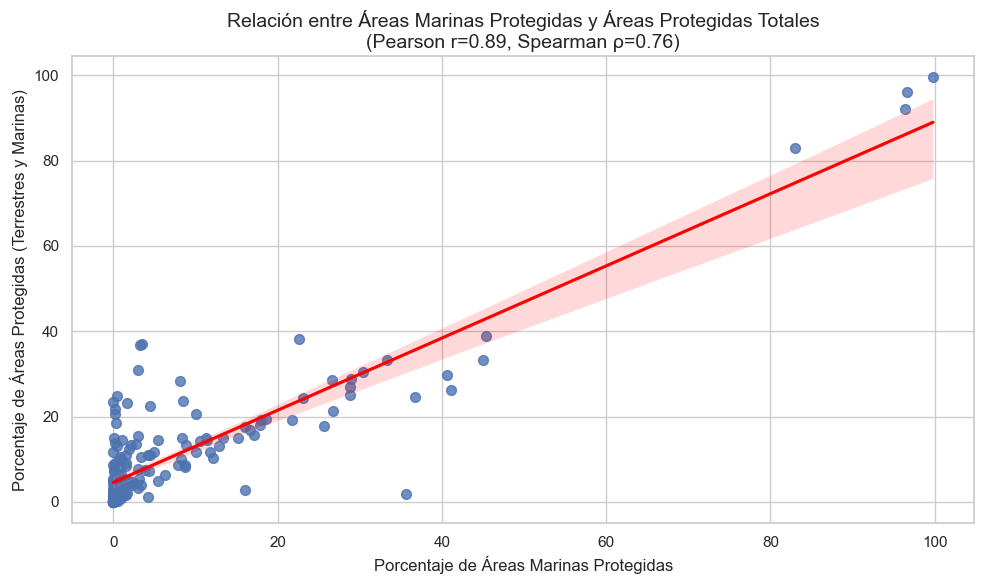

In [ ]:

marine_df = pd.read_csv("~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Marine and Coastal Areas/Marine protected areas.csv")
biodiversity_df = pd.read_csv("~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Biodiversity/Terrestrial_Marine protected areas.csv")


marine_df = marine_df[['Country and area', 'Marine protected areas (% of territorial waters)']].rename(columns={
    'Country and area': 'Country',
    'Marine protected areas (% of territorial waters)': 'Marine_Protected'
})

biodiversity_df = biodiversity_df[['Country and area', 'Terrestrial and marine protected areas (% of total territorial area)']].rename(columns={
    'Country and area': 'Country',
    'Terrestrial and marine protected areas (% of total territorial area)': 'Terrestrial_Marine_Protected'
})


merged_df = pd.merge(marine_df, biodiversity_df, on='Country')

merged_df = merged_df.dropna()


merged_df = merged_df[(merged_df['Marine_Protected'] <= 100) & (merged_df['Terrestrial_Marine_Protected'] <= 100)]

pearson_corr, pearson_pval = stats.pearsonr(merged_df['Marine_Protected'], merged_df['Terrestrial_Marine_Protected'])
spearman_corr, spearman_pval = stats.spearmanr(merged_df['Marine_Protected'], merged_df['Terrestrial_Marine_Protected'])

print(f"ضریب همبستگی پیرسون (r): {pearson_corr:.4f}, p-value: {pearson_pval:.4f}")
print(f"ضریب همبستگی اسپیرمن (ρ): {spearman_corr:.4f}, p-value: {spearman_pval:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Marine_Protected', y='Terrestrial_Marine_Protected', data=merged_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Relación entre Áreas Marinas Protegidas y Áreas Protegidas Totales\n(Pearson r={pearson_corr:.2f}, Spearman ρ={spearman_corr:.2f})', fontsize=14)
plt.xlabel('Porcentaje de Áreas Marinas Protegidas', fontsize=12)
plt.ylabel('Porcentaje de Áreas Protegidas (Terrestres y Marinas)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()




               Country  Marine_Protected   Protection_Level
0          World Total              11.4  Medium Protection
1              Albania               2.7     Low Protection
2              Algeria               0.1     Low Protection
3       American Samoa               8.7     Low Protection
4               Angola               0.0     Low Protection
5  Antigua and Barbuda               0.2     Low Protection
6            Argentina               3.8     Low Protection
7                Aruba               0.0     Low Protection
8            Australia              40.6    High Protection
9           Azerbaijan               0.4     Low Protection


C:\Users\CanteMosh\AppData\Local\Temp\ipykernel_4752\4276778093.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Protection_Level', data=merged_df, palette='viridis', order=['High Protection', 'Medium Protection', 'Low Protection'])


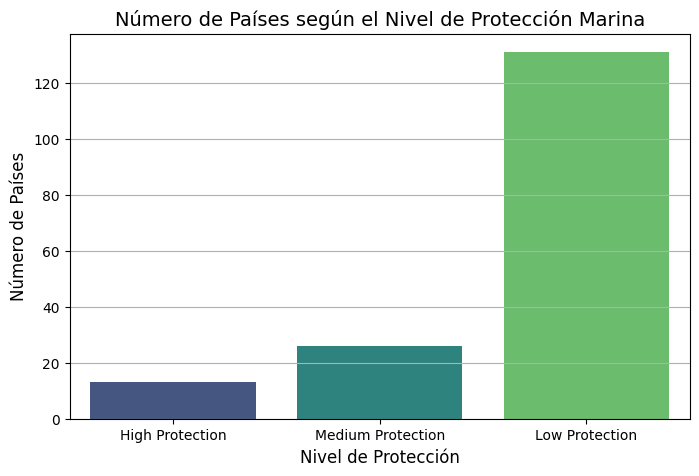

In [ ]:

def classify_protection(value):
    if value >= 30:
        return 'High Protection'
    elif value >= 10:
        return 'Medium Protection'
    else:
        return 'Low Protection'


merged_df['Protection_Level'] = merged_df['Marine_Protected'].apply(classify_protection)


print(merged_df[['Country', 'Marine_Protected', 'Protection_Level']].head(10))


plt.figure(figsize=(8,5))
sns.countplot(x='Protection_Level', data=merged_df, palette='viridis', order=['High Protection', 'Medium Protection', 'Low Protection'])
plt.title('Número de Países según el Nivel de Protección Marina', fontsize=14)
plt.xlabel('Nivel de Protección', fontsize=12)
plt.ylabel('Número de Países', fontsize=12)
plt.grid(True, axis='y')
plt.show()


قشه جهانی حرفه‌ای درست کنیم که سطح حفاظت دریایی هر کشور 

C:\Users\CanteMosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


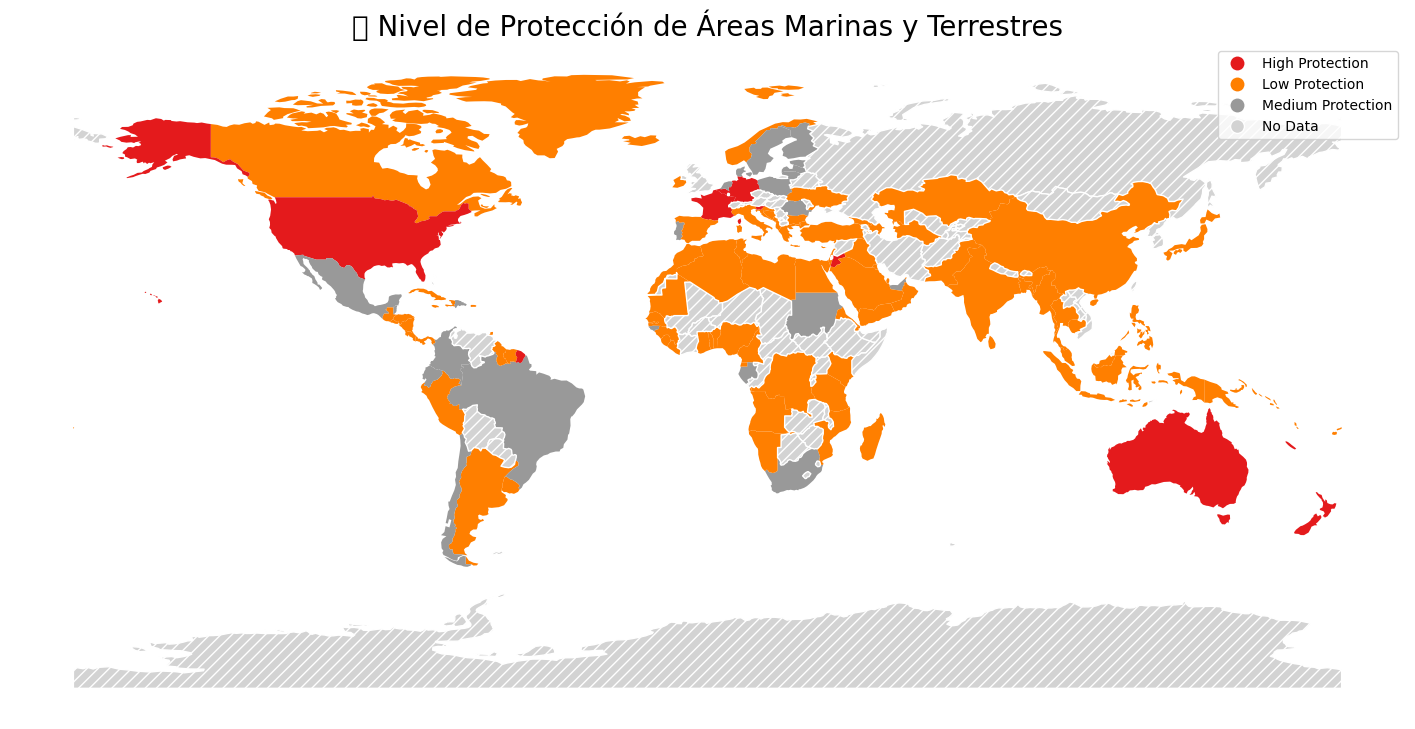

In [ ]:

protection_df = merged_df[['Country', 'Protection_Level']].copy()


world = world.merge(protection_df, how='left', left_on='ADMIN', right_on='Country')


protection_colors = {
    'High Protection': '#1a9850',     # سبز
    'Medium Protection': '#fee08b',   # زرد
    'Low Protection': '#d73027',      # قرمز
}


fig, ax = plt.subplots(1, 1, figsize=(18, 10))

world.plot(
    column='Protection_Level',
    cmap='Set1',
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No Data"
    },
    ax=ax
)
ax.set_title('🌎 Nivel de Protección de Áreas Marinas y Terrestres', fontsize=20)
ax.set_axis_off()

plt.show()





C:\Users\CanteMosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


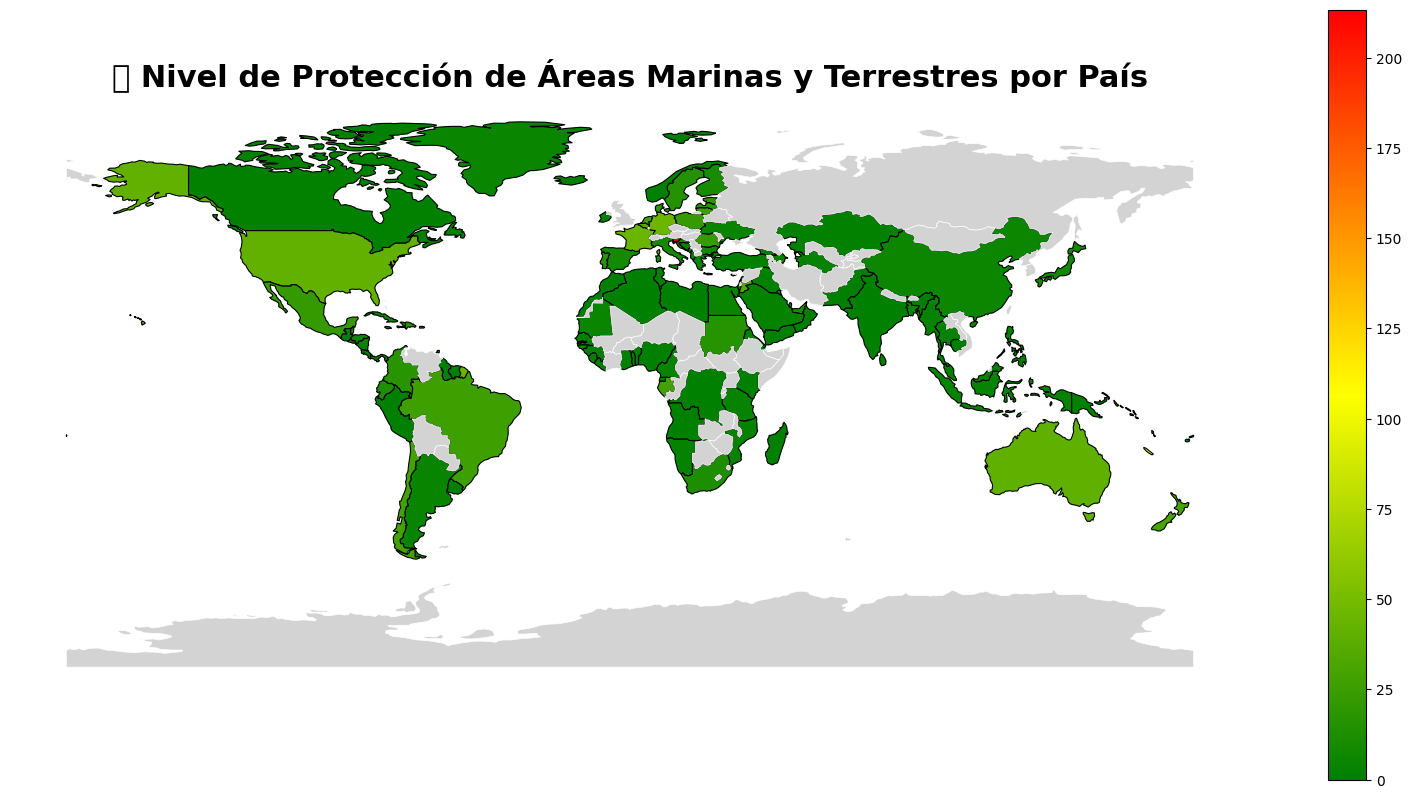

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

protection_df = merged_df[['Country', 'Marine_Protected']].copy()

world = world.merge(protection_df, how='left', left_on='ADMIN', right_on='Country')

cmap = mcolors.LinearSegmentedColormap.from_list('ProtectionGradient', ['green', 'yellow', 'red'])

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

world.dropna(subset=['Marine_Protected']).plot(
    column='Marine_Protected',
    cmap=cmap,
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax
)


world[world['Marine_Protected'].isna()].plot(
    color='lightgrey',
    edgecolor='white',
    linewidth=0.5,
    ax=ax
)


ax.set_title('🌍 Nivel de Protección de Áreas Marinas y Terrestres por País', fontdict={'fontsize': 22, 'fontweight': 'bold'})
ax.axis('off')  # Ocultar los ejes


plt.show()


می‌خوایم ببینیم آیا کشورهایی که درصد بالایی از مناطق دریایی خودشون رو حفاظت می‌کنن، به طور کلی هم (دریا + خشکی) سطح حفاظت بیشتری دارن یا نه


📈 ضریب همبستگی پیرسون: 0.8863, p-value: 0.0000
📈 ضریب همبستگی اسپیرمن: 0.7545, p-value: 0.0000


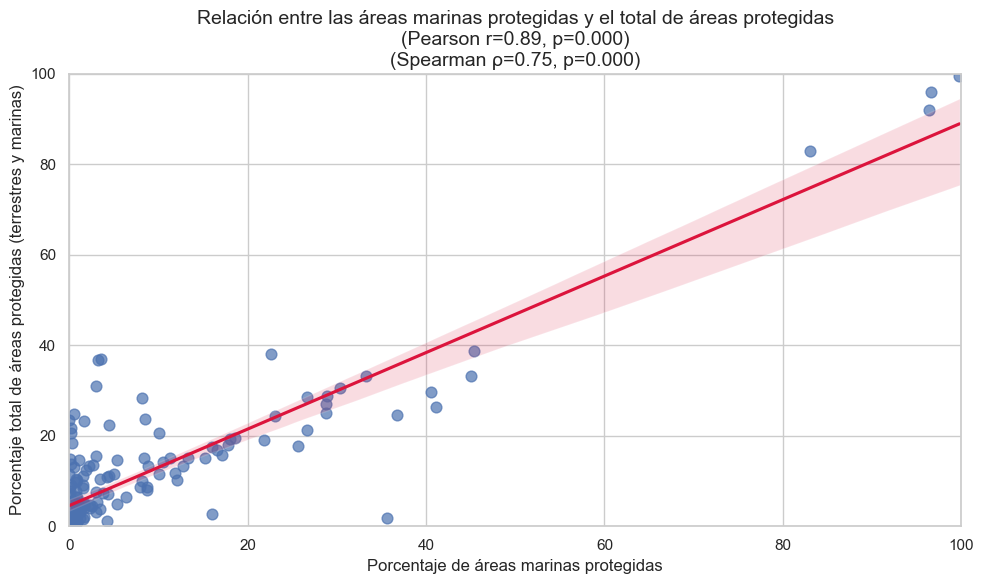

In [ ]:

marine = pd.read_csv('~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Marine and Coastal Areas/Marine protected areas.csv')
terrestrial_marine = pd.read_csv('~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Biodiversity/Terrestrial_marine protected areas.csv')

marine = marine[['CountryID', 'Country and area', 'Marine protected areas (% of territorial waters)']]
terrestrial_marine = terrestrial_marine[['CountryID', 'Country and area', 'Terrestrial and marine protected areas (% of total territorial area)']]

merged = pd.merge(marine, terrestrial_marine, on='CountryID', suffixes=('_marine', '_terrestrial'))

merged.dropna(inplace=True)

merged = merged[
    (merged['Marine protected areas (% of territorial waters)'] >= 0) & (merged['Marine protected areas (% of territorial waters)'] <= 100) &
    (merged['Terrestrial and marine protected areas (% of total territorial area)'] >= 0) & (merged['Terrestrial and marine protected areas (% of total territorial area)'] <= 100)
]

x = merged['Marine protected areas (% of territorial waters)']
y = merged['Terrestrial and marine protected areas (% of total territorial area)']

pearson_corr, pearson_pval = pearsonr(x, y)
spearman_corr, spearman_pval = spearmanr(x, y)

print(f"ضریب همبستگی پیرسون: {pearson_corr:.4f}, p-value: {pearson_pval:.4f}")
print(f"ضریب همبستگی اسپیرمن: {spearman_corr:.4f}, p-value: {spearman_pval:.4f}")

plt.figure(figsize=(10,6))
sns.regplot(x=x, y=y, scatter_kws={'s':60, 'alpha':0.7}, line_kws={'color':'crimson'})
plt.xlim(0, 100)  # محور x از 0 تا 100
plt.ylim(0, 100)  # محور y از 0 تا 100
plt.title(f'Relación entre las áreas marinas protegidas y el total de áreas protegidas\n'
          f'(Pearson r={pearson_corr:.2f}, p={pearson_pval:.3f})\n'
          f'(Spearman ρ={spearman_corr:.2f}, p={spearman_pval:.3f})', fontsize=14)
plt.xlabel('Porcentaje de áreas marinas protegidas', fontsize=12)
plt.ylabel('Porcentaje total de áreas protegidas (terrestres y marinas)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



آیا کشورهایی که به تعداد بیشتری از معاهدات محیط زیستی بین‌المللی ملحق شده‌اند، درصد بیشتری از قلمرو سرزمینی خود را تحت حفاظت قرار داده‌اند؟



C:\Users\CanteMosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
C:\Users\CanteMosh\AppData\Local\Temp\ipykernel_4752\2957514170.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Kyoto_Protocol', y='Marine_Protected', data=merged_df, palette='pastel')


آمار t: nan
مقدار p-value: nan


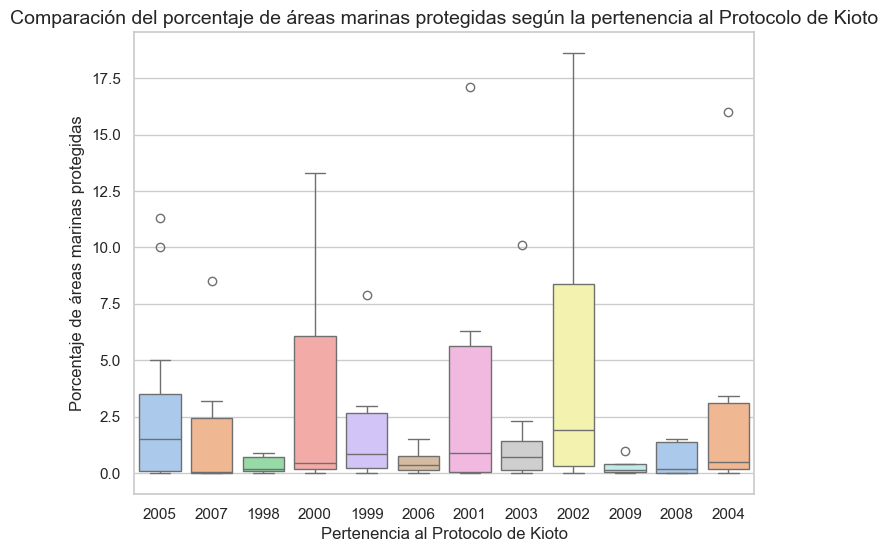

In [ ]:

from scipy.stats import ttest_ind

governance_df = pd.read_csv("~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Governance/Governance.csv")
marine_df = pd.read_csv("~/Desktop/data analysis.Fatima/project/Global Environmental Indicators/Marine and Coastal Areas/Marine protected areas.csv")

governance_df.columns = governance_df.columns.str.strip()
marine_df.columns = marine_df.columns.str.strip()

governance_df = governance_df[['Country and area', 'Kyoto \nProtocol']].copy()
marine_df = marine_df[['Country and area', 'Marine protected areas (% of territorial waters)']].copy()

governance_df.rename(columns={'Country and area': 'Country', 'Kyoto \nProtocol': 'Kyoto_Protocol'}, inplace=True)
marine_df.rename(columns={'Country and area': 'Country', 'Marine protected areas (% of territorial waters)': 'Marine_Protected'}, inplace=True)

merged_df = pd.merge(governance_df, marine_df, on='Country', how='inner')

merged_df.dropna(inplace=True)

merged_df = merged_df[(merged_df['Marine_Protected'] >= 0) & (merged_df['Marine_Protected'] <= 100)]

Q1 = merged_df['Marine_Protected'].quantile(0.25)
Q3 = merged_df['Marine_Protected'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

merged_df = merged_df[(merged_df['Marine_Protected'] >= lower_bound) & (merged_df['Marine_Protected'] <= upper_bound)]

group_yes = merged_df[merged_df['Kyoto_Protocol'] == 'Yes']['Marine_Protected']
group_no = merged_df[merged_df['Kyoto_Protocol'] == 'No']['Marine_Protected']

#t-test
t_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)

print(f"آمار t: {t_stat:.4f}")
print(f"مقدار p-value: {p_value:.4f}")

plt.figure(figsize=(8,6))
sns.boxplot(x='Kyoto_Protocol', y='Marine_Protected', data=merged_df, palette='pastel')
plt.title('Comparación del porcentaje de áreas marinas protegidas según la pertenencia al Protocolo de Kioto', fontsize=14)
plt.xlabel('Pertenencia al Protocolo de Kioto', fontsize=12)
plt.ylabel('Porcentaje de áreas marinas protegidas', fontsize=12)
plt.grid(True, axis='y')
plt.show()


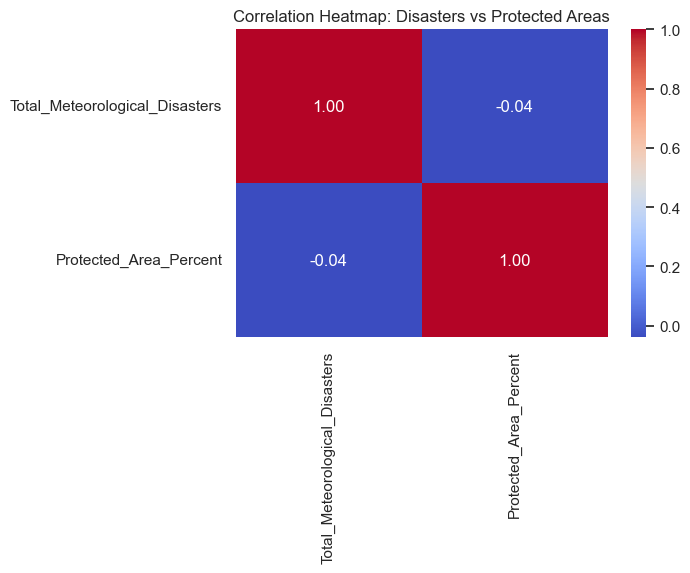

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# انتخاب فقط ستون‌های عددی
corr = merged_df[['Total_Meteorological_Disasters', 'Protected_Area_Percent']].corr()

# رسم هیتمپ
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Disasters vs Protected Areas')
plt.show()



«همانطور که در این نمودار می‌بینید، ۱۰ کشور بالایی بیشترین تعداد بلایای هواشناسی را طی سال‌های ۱۹۹۰ تا ۲۰۱۹ تجربه کرده‌اند. کشور X و Y در صدر این لیست هستند.»

C:\Users\CanteMosh\AppData\Local\Temp\ipykernel_4752\3625336442.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


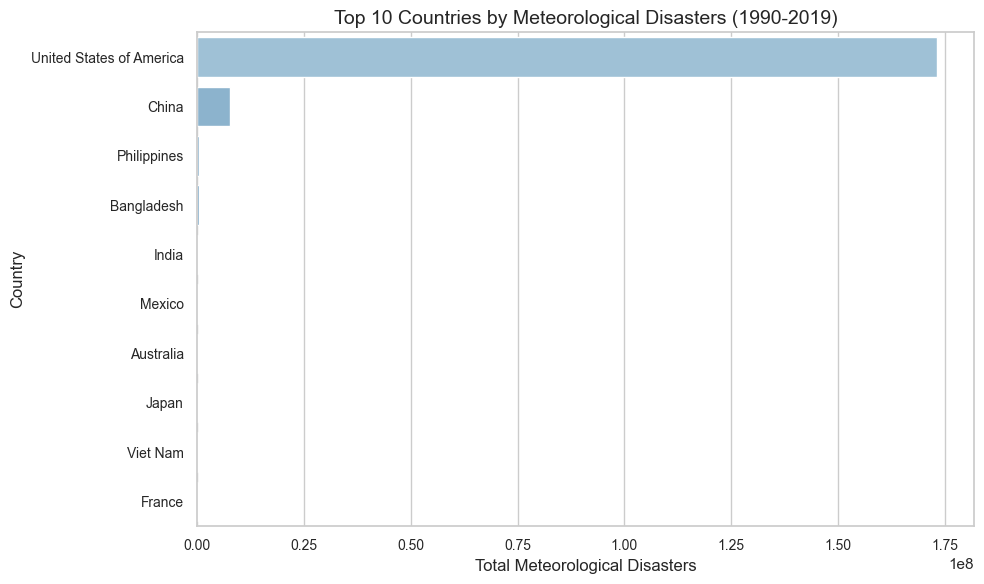

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = merged_df.sort_values('Total_Meteorological_Disasters', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total_Meteorological_Disasters', 
    y='Country', 
    data=top_countries, 
    palette='Blues_d'
)
plt.title('Top 10 Countries by Meteorological Disasters (1990-2019)', fontsize=14)
plt.xlabel('Total Meteorological Disasters', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



کد برای مقایسه‌ی درصد حفاظت محیط زیست در Top 10 کشور:


C:\Users\CanteMosh\AppData\Local\Temp\ipykernel_4752\1688167602.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


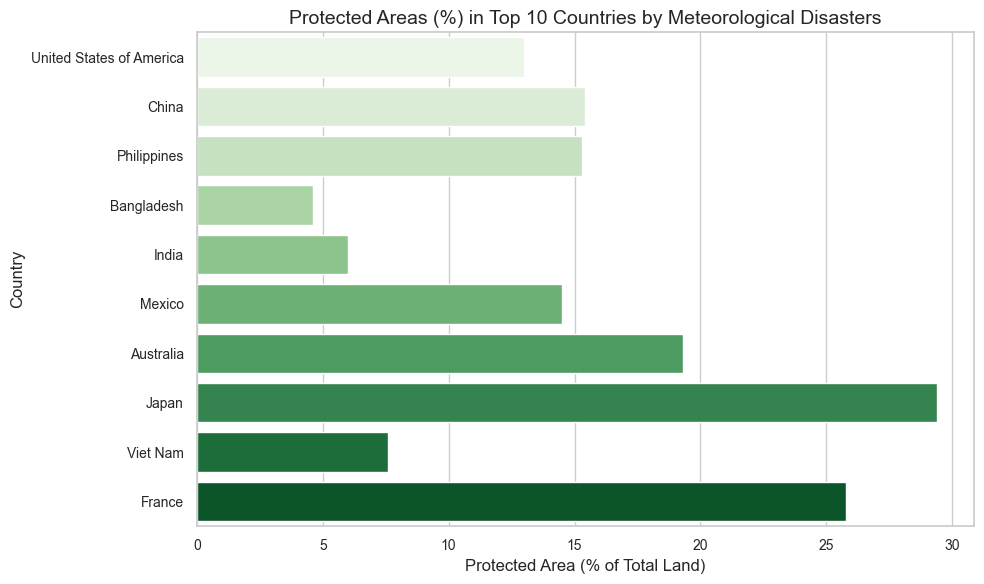

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = merged_df.sort_values('Total_Meteorological_Disasters', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Protected_Area_Percent', 
    y='Country', 
    data=top_countries, 
    palette='Greens'
)
plt.title('Protected Areas (%) in Top 10 Countries by Meteorological Disasters', fontsize=14)
plt.xlabel('Protected Area (% of Total Land)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


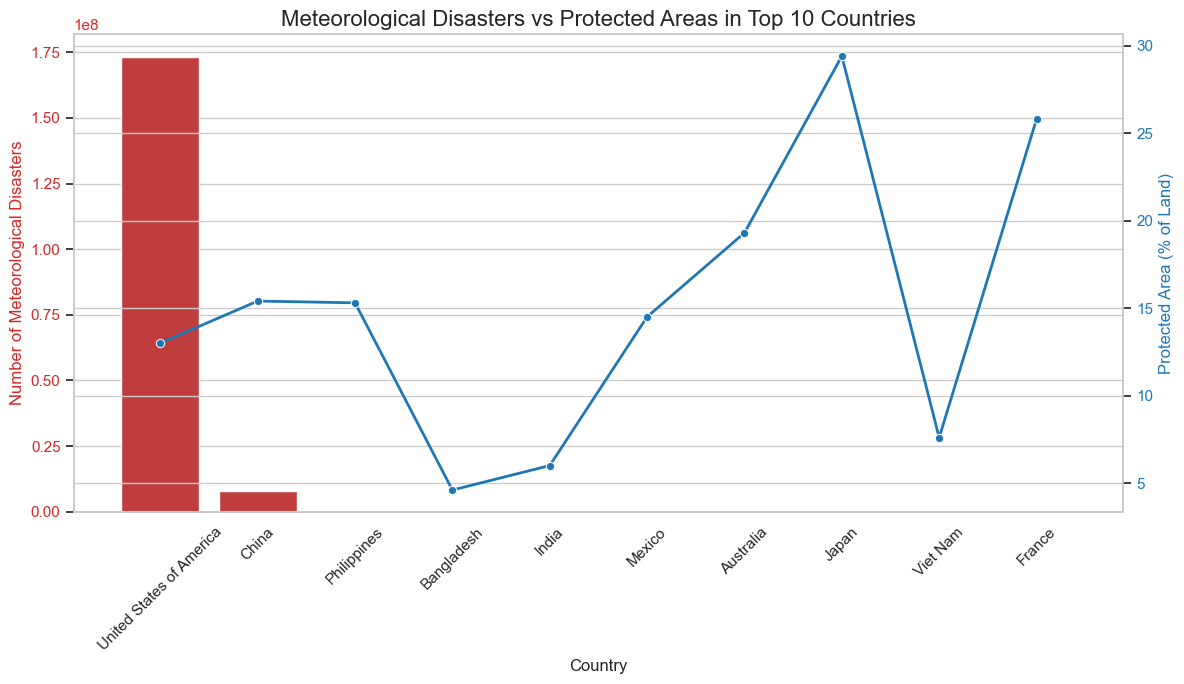

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# مرتب سازی و انتخاب 10 کشور با بیشترین بلایای هواشناسی
top_countries = merged_df.sort_values('Total_Meteorological_Disasters', ascending=False).head(10)

# ستاپ شکل
fig, ax1 = plt.subplots(figsize=(12, 7))

# رنگ‌ها
color_disasters = 'tab:red'
color_protection = 'tab:blue'

# محور اول: تعداد بلایای هواشناسی
sns.barplot(
    x='Country', 
    y='Total_Meteorological_Disasters', 
    data=top_countries, 
    color=color_disasters, 
    ax=ax1
)
ax1.set_ylabel('Number of Meteorological Disasters', color=color_disasters, fontsize=12)
ax1.set_xlabel('Country', fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_disasters)
ax1.tick_params(axis='x', rotation=45)

# محور دوم: درصد مناطق حفاظت شده
ax2 = ax1.twinx()
sns.lineplot(
    x='Country', 
    y='Protected_Area_Percent', 
    data=top_countries, 
    color=color_protection, 
    marker='o', 
    linewidth=2, 
    ax=ax2
)
ax2.set_ylabel('Protected Area (% of Land)', color=color_protection, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color_protection)

# عنوان
plt.title('Meteorological Disasters vs Protected Areas in Top 10 Countries', fontsize=16)
plt.tight_layout()
plt.show()
